<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Beyond the Fundamental: A Spectral Adventure </b></h3>

**Автор**: Ермекова Асель

*P.S.* *На русском перевод емкого и классного названия не получился у меня. Если у вас есть идеи как назвать эту домашку прикольно, пишите в чатике в телеграме ваши предложения русского варианта названия домашки!*

# **Homework: Beyond the Fundamental: A Spectral Adventure**

## **Introduction**

**Что делает скрипку похожей на скрипку?**

Вы когда-нибудь задумывались, почему скрипка, флейта и гитара звучат совершенно по-разному, даже играя одну и ту же ноту на одинаковой громкости?

Ответ кроется в фундаментальном свойстве звука, называемом тембром. Тембр — это «цвет» или «текстура» звука — то, что позволяет вам мгновенно отличить трубу от фортепиано или голос вашего друга от голоса незнакомца, даже если они поют в одной тональности.

**Но что физически создаёт тембр?**

Всё сводится к гармоникам — смеси частот, сопровождающих основной тон, — и тому, как их амплитуды и фазы изменяются с течением времени. Два инструмента, играющие ноту Ля или А4 (A4 — это нота Ля первой октавы с частотой 440 Гц), оба воспроизводят эту основную частоту, но также генерируют разные наборы обертонов или гармоник (2×440 Гц, 3×440 Гц и т. д.) с уникальной интенсивностью и паттернами. Этот спектральный «отпечаток» называют тембром.

В этом домашнем задании вы станете аудиодетективом. Используя реальные записи разных инструментов, вы:

* Проанализируете их частотные спектры, чтобы увидеть, чем отличаются гармоники,
* Узнаете, почему выбор оконной функции важен при вычислении спектрограмм,
* Реализуете Mel-спектрограмму — представление, имитирующее человеческий слух,
* Обучите простой классификатор распознавать инструменты по их тембру.

Давайте приступим!

Домашнее задание будет состоять из 3 заданий:

* **Task 1.** **Harmonic and Frequency Spectrum Analysis.** Анализ гармонического и частотного спектра различных инструментов.

* **Task 2.** **Windowing in STFT – Why Not Rectangular?** Анализ оконных функций для STFT и почему нам нужны другие формы оконной функции.

* **Task 3.** **Implement Your Own Mel-Spectrogram Transform.** Напишите свою собственную функцию, которая преобразует спектрограмму в мел-спектрограмму и сравнивает с мел-спектрограммой из librosa.

## **Submission Instructions**

- Отправьте **Jupyter Notebook** с:
  - Всем кодом
  - Графиками
  - Ответами на вопросы
- Назовите его: `DLS_HW2_Spectrograms_<ваше_имя>.ipynb`

Домашнее задание будет проверяться в формате peer-review, т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.

# **Load libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import stft
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')

# **Task 1: Harmonic and Frequency Spectrum Analysis** [6 score]

### **Цель**: Понять, как разные инструменты создают разные гармонические структуры для одной и той же высоты звука → это и есть **тембр**.



### **1.1 Load a WAV file** [0.5 score]
- Download file `Vn-ord-A5-pp-1c-N.wav`
- Use `librosa.load(path, sr=None)` to load the audio. Keep the original sampling rate.
- Print the sampling rate and duration.

In [ ]:
!gdown 1JOFNfzNzV5RTDv6YBFZ0lKZRfyoukW7O # download violin playing A5: Vn-ord-A5-pp-1c-N.wav

Downloading...
From: https://drive.google.com/uc?id=1JOFNfzNzV5RTDv6YBFZ0lKZRfyoukW7O
To: /content/Vn-ord-A5-pp-1c-N.wav
100% 699k/699k [00:00<00:00, 145MB/s]


In [ ]:
# Example: Load violin A5
audio_path = # your code here
y, sr = # your code here  # Keep original sampling rate

print(f"Sampling rate: {sr} Hz")
print(f"Duration: {len(y)/sr:.2f} seconds")

### **1.2 Compute the Fourier Transform and plot the magnitude spectrum** [1 score]
- Compute the FFT of the entire audio signal. Use `np.fft.rfft` and `np.fft.rfftfreq`.
- Compute absolute values of the magnitude with `np.abs()` and normalize it.
- Plot the magnitude spectrum (only up to Nyquist frequency).
- Label axes: frequency (Hz) vs magnitude.

> 💡 **Tip**: Normalize magnitude by dividing by `len(signal)`.

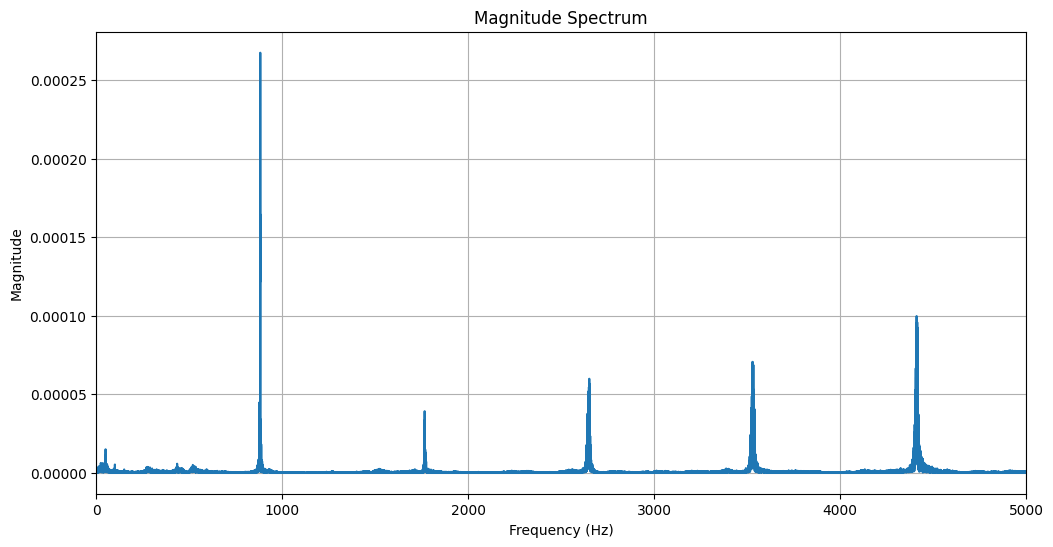

In [ ]:
# Compute FFT
# your code here

# Plot
# your code here

### **1.3 Identify and plot harmonics** [0.5 score]
- Find the **fundamental frequency** (f₀) corresponding to the pitch (e.g., A4 = 440 Hz).
- Calculate harmonics f₀, 2f₀, 3f₀, ..., up to 5000 Hz.
- Plot harmonics as vertical dashed lines and annotate them (e.g., "1st harmonic", "2nd harmonic").

> 📌 **Hint**: You can get theoretical f₀ from `librosa.note_to_hz('A4')`.

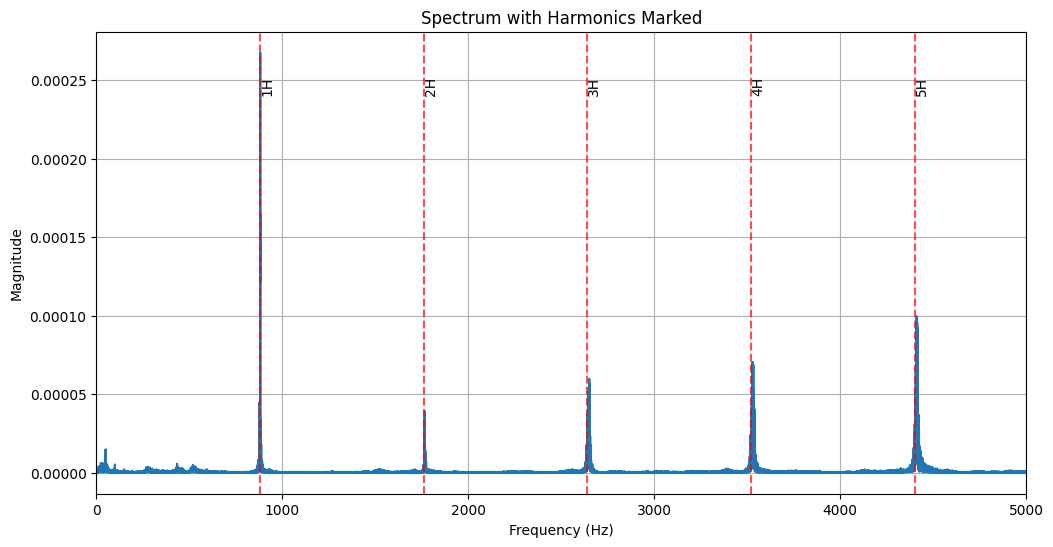

In [ ]:
f0 = # your code here
max_freq = 5000
harmonics = []
n = 1
while n * f0 <= max_freq:
    harmonics.append(# your code here)
    n += 1

# Plot with harmonics marked
# your code here

### **1.4 Answer: What is the fundamental frequency? What are the amplitudes of the 2nd, 3rd, and 5th harmonics?** [1 score]
- What is the fundamental frequency?
- What are the amplitudes of the 2nd, 3rd, and 5th harmonics?
- Report numerical values (in Hz and amplitude).
- Is the strongest peak always at f₀?

In [ ]:
# Find peaks near harmonic frequencies
def get_harmonic_amplitude(freq, spectrum, freqs):
    # your code here
    return # your code here

fundamental_amp = get_harmonic_amplitude(f0, magnitude, freqs)
second_harm_amp = get_harmonic_amplitude(2*f0, magnitude, freqs)
third_harm_amp = get_harmonic_amplitude(3*f0, magnitude, freqs)
fifth_harm_amp = get_harmonic_amplitude(5*f0, magnitude, freqs)

print(f"Fundamental frequency (f0): {f0:.1f} Hz")
print(f"Fundamental amplitude: {fundamental_amp:.4f}")
print(f"2nd harmonic amplitude: {second_harm_amp:.4f}")
print(f"3rd harmonic amplitude: {third_harm_amp:.4f}")
print(f"5th harmonic amplitude: {fifth_harm_amp:.4f}")

Fundamental frequency (f0): 880.0 Hz
Fundamental amplitude: 0.0003
2nd harmonic amplitude: 0.0000
3rd harmonic amplitude: 0.0001
5th harmonic amplitude: 0.0001


### **1.5 Repeat for another instruments playing the same pitch** [1 score]
- Choose a different instruments.
- Repeat steps 1.1–1.3.
- **Compare** the two spectra (Violin and another instrument):
  - Are the harmonic amplitudes similar?
  - Which instrument has more high-frequency harmonics?
  - How does this relate to timbre?

In [ ]:
!gdown 19RVoksj40dds4lfSiha17HuTLYCFvwCs # Cello: Vc-ord-A5-pp-1c-N.wav
!gdown 1gVMlgMg9wGyPGRIbu7e_Q67JfzU0Rn1E # Accordion: Acc-ord-A5-pp-N-N.wav
!gdown 1gstlGhDe7SYEMpHQV6N50zb8TPByL2gI # Flute: Fl-ord-A5-pp-N-N.wav

Downloading...
From: https://drive.google.com/uc?id=19RVoksj40dds4lfSiha17HuTLYCFvwCs
To: /content/Vc-ord-A5-pp-1c-N.wav
100% 651k/651k [00:00<00:00, 150MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gVMlgMg9wGyPGRIbu7e_Q67JfzU0Rn1E
To: /content/Acc-ord-A5-pp-N-N.wav
100% 600k/600k [00:00<00:00, 137MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gstlGhDe7SYEMpHQV6N50zb8TPByL2gI
To: /content/Fl-ord-A5-pp-N-N.wav
100% 535k/535k [00:00<00:00, 76.4MB/s]


In [ ]:
database = {'Accordion': 'Acc-ord-A5-pp-N-N.wav',
            'Cello': 'Vc-ord-A5-pp-1c-N.wav',
            'Flute': 'Fl-ord-A5-pp-N-N.wav',
            'Violin': 'Vn-ord-A5-pp-1c-N.wav'}

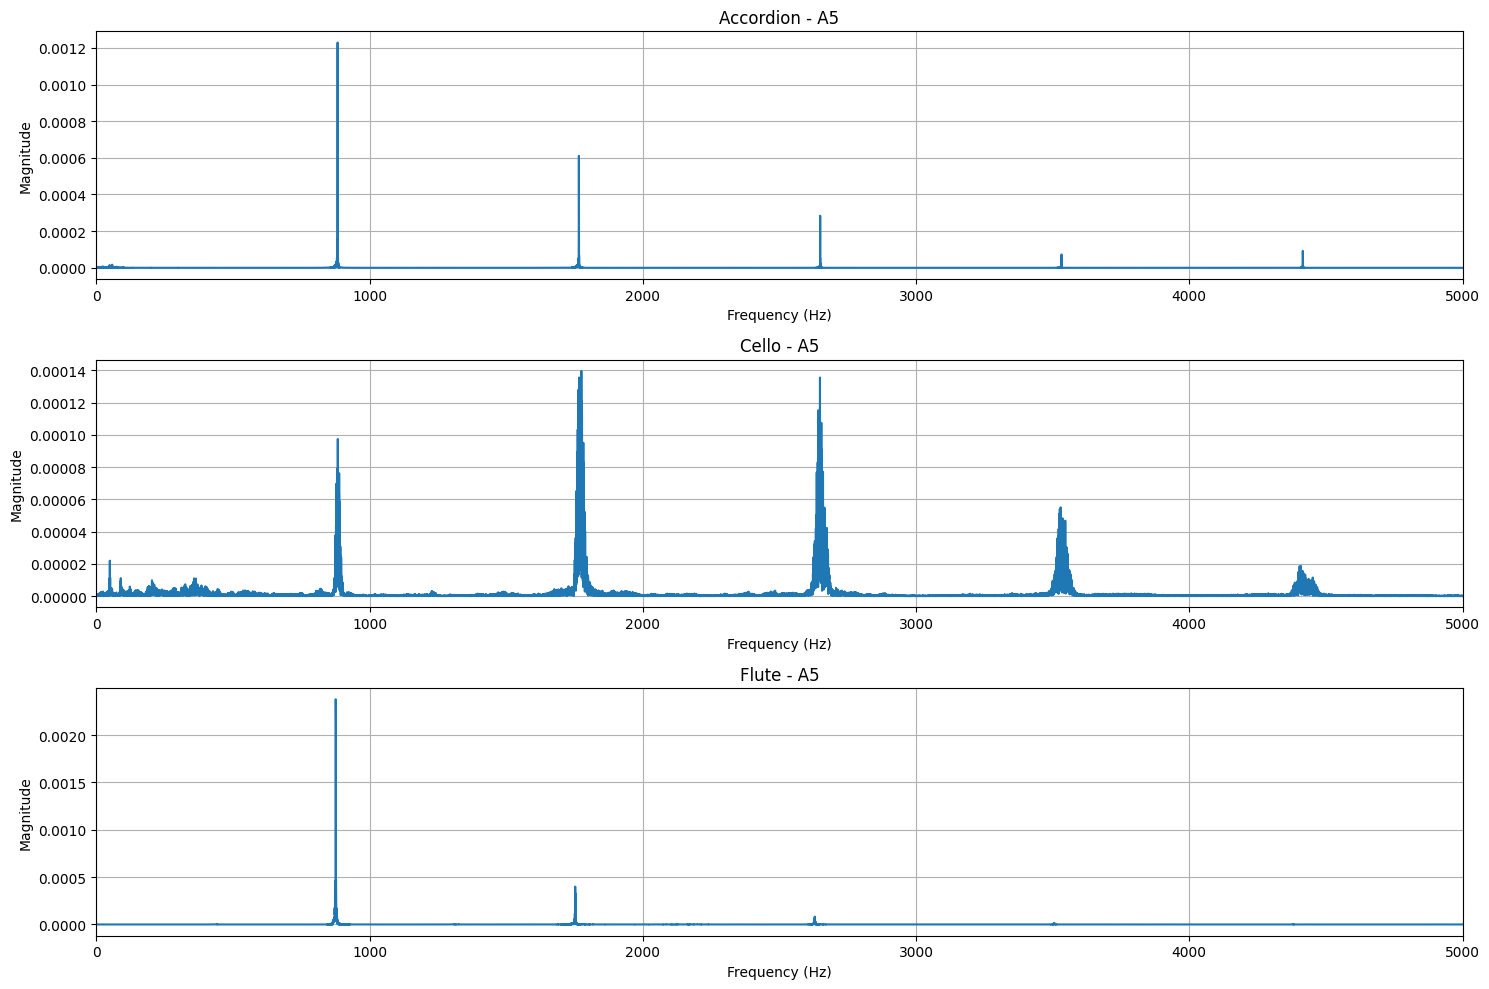

In [ ]:
instruments_to_compare = ['Accordion', 'Cello', 'Flute']
plt.figure(figsize=(15, 10))

for i, inst in enumerate(instruments_to_compare):

    path_to_wav = database[inst]
    y_inst, sr_inst = # your code here

    # Compute FFT
    Y_inst = # your code here
    # Get frequencies
    freqs_inst = # your code here
    # Extract magnitude and normalize it
    magnitude_inst = # your code here

    plt.subplot(3, 1, i+1)
    plt.plot(freqs_inst, magnitude_inst)
    plt.xlim(0, 5000)
    plt.title(f'{inst.capitalize()} - A5')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Analysis:
# - Violin: rich in high harmonics, complex spectrum
# - Flute: mostly fundamental, few weak harmonics
# - Guitar: strong fundamental and lower harmonics, decaying higher harmonics
# This difference in harmonic content IS timbre!

### **1.6 Count significant harmonics** [1 score]
- Define a "significant harmonic" as one with amplitude > 10% of the max amplitude.
- For **Flute** and **Violin** (same pitch), count how many significant harmonics each has.
- Which instrument is "brighter"? Why?

In [ ]:
def count_significant_harmonics(magnitude, freqs, f0, max_freq=5000, threshold_ratio=0.1):
    # your code here

    return len(harmonics), harmonics

# Compare Flute and violin
for inst in ['Flute', 'Violin']:
    path_to_wav = database[inst]
    y_inst, sr_inst = librosa.load(path_to_wav, sr=None)
    # Compute FFT
    Y_inst = # your code here
    # Get frequencies
    freqs_inst = # your code here
    # Extract magnitude and normalize it
    magnitude_inst = # your code here

    count, harm_list = count_significant_harmonics(magnitude_inst, freqs_inst, f0)
    print(f"{inst.capitalize()}: {count} significant harmonics")

Flute: 2 significant harmonics
Violin: 5 significant harmonics


### **1.7. Simple Instrument Classification** [2 score]
- Select 3 instruments, each with 10 examples of the **same pitch** (e.g., A4).
- **Approach A**: Use raw audio waveforms (flattened) as features → train a Random Forest.
- **Approach B**: Use magnitude spectrum (first 1024 bins) as features → train same model.
- Compare accuracy on a test set.
- **Question**: Why does Approach B perform better?

> 🛠️ Use `sklearn.tree.RandomForestClassifier` and `train_test_split`.

First, download dataset.

In [ ]:
!gdown --folder 1wMa4fDtWRtO-YAz-gY5Jdrl94GQZUwmO # download dataset

Retrieving folder contents
Retrieving folder 1iRMqnkH7_GFqdt4EQ-XNIvzrGpWEY7BJ Strings
Retrieving folder 1AYkFHBz5tmYeC_TXouqyrXHobvwlpmAg Violin
Retrieving folder 1MczsLg3MRdzt5-xJ6nvqxRAaEjUOCZ27 ordinario
Processing file 14EjlXc_tdIJYbyMysUiC4hLRYfjV3HAv Vn-ord-A5-ff-1c-N.wav
Processing file 1JVag7kvYhGLW5ZVLJ-mxDXZ-F1wPLA02 Vn-ord-A5-ff-2c-N.wav
Processing file 1vQl-LIBK1JakJoDdR7sv-jdidz_COToj Vn-ord-A5-ff-3c-N.wav
Processing file 1z85hpjJPvFXp1V5cD3pD88-8aD0Zn1a1 Vn-ord-A5-mf-1c-N.wav
Processing file 1jptv0jF2rwILfPXwo8DdtWK533p4OK13 Vn-ord-A5-mf-2c-N.wav
Processing file 1jRAo5qm2zIsqf0sGzowAzb4emktEopWz Vn-ord-A5-mf-3c-N.wav
Processing file 1kbocn0_6etfg_LLBX4SAESNwBAqxOyWi Vn-ord-A5-pp-1c-N.wav
Processing file 1p5Xs5rXQX6e_wAtLXOixcB7C6hB9aEgI Vn-ord-A5-pp-2c-N.wav
Processing file 1E2xvckcJZSu68_yyJM_xl8aWsudNRZ5n Vn-ord-A5-pp-3c-N.wav
Retrieving folder 1bgPVnul9gXyQ1GK2YJDCY3JzKkcVlyRi Violoncello
Retrieving folder 1CjCmGKunsLKLLxfB8mbvZP7--YepiIH0 ordinario
Processing file 1q

In [ ]:
df = pd.read_csv("/content/TinySOL_short/TinySOL_short.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare data for 3 instruments, same pitch (A5)
instruments_class = ['Violin', 'Flute', 'Cello']
X_wave = # your code here
X_spec = # your code here
y_labels = # your code here


# Split data
# your code here

# Train classifiers
clf_wave = # your code here
clf_spec = # your code here


# Evaluate
acc_wave = # your code here
acc_spec = # your code here

print(f"Accuracy with raw waveforms: {acc_wave:.3f}")
print(f"Accuracy with spectra: {acc_spec:.3f}")

Accuracy with raw waveforms: 0.400
Accuracy with spectra: 0.800


**Answer**: YOUR ANSWER HERE

# **Task 2: Windowing in STFT – Why Not Rectangular?** [10 score]

### **Goal**: Understand spectral leakage and why smooth windows (e.g., Hann) are preferred.

### **2.1 Load a pure sine wave** [0.5 score]
- Generate a 440 Hz sine wave, 1 second long, at 22050 Hz sampling rate.
- Plot the waveform.

$$y = \sin(2 \pi ft)$$

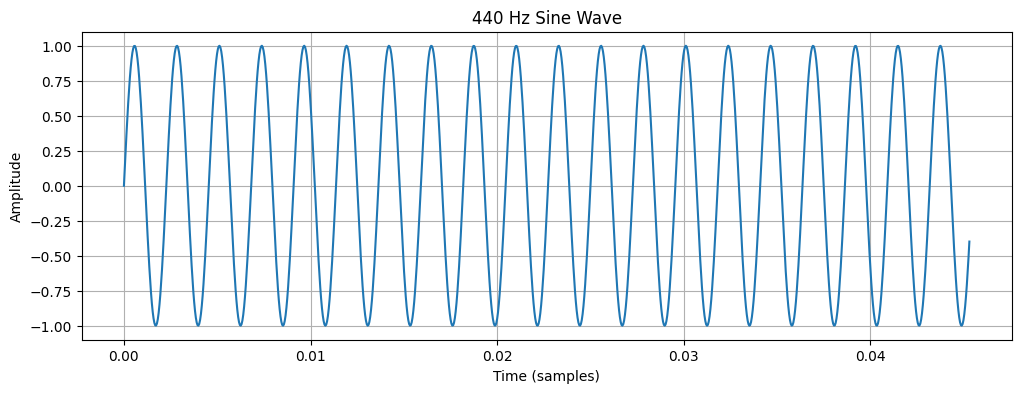

In [ ]:
sr = 22050
duration = 1.0
t = np.linspace(0, duration, int(sr * duration), endpoint=False)
f0 = 440
sine_wave = # your code here

# Plot waveform and Show first 1000 samples


### **2.2 Compute STFT with rectangular window** [1 score]
- Use `scipy.signal.stft` with `window='boxcar'` (rectangular), `nperseg=1024`, `noverlap=512`.
- Plot the spectrogram (use `plt.pcolormesh` with dB scale).

> 💡 Convert to dB: `10 * np.log10(np.abs(Zxx) + 1e-10)`

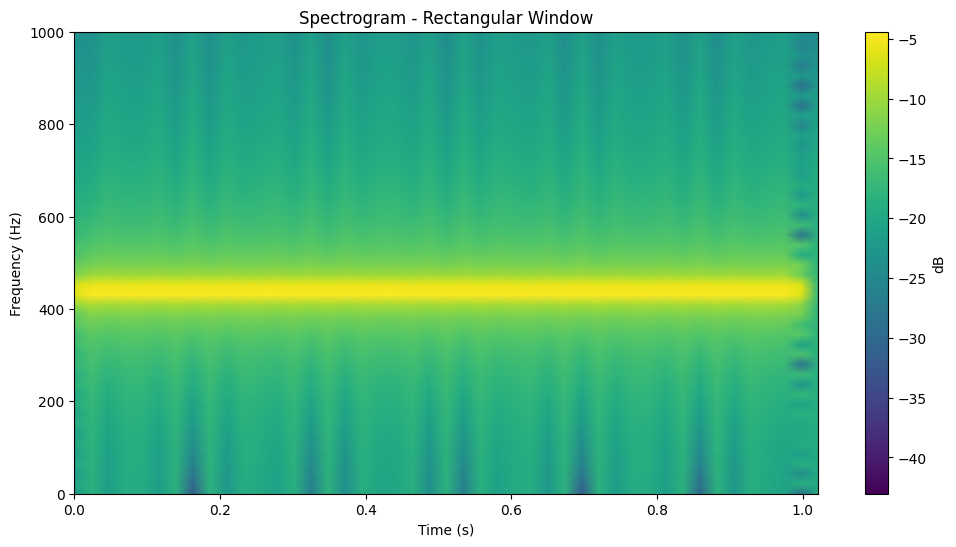

In [ ]:
from scipy.signal import stft

# Compute STFT with rectangular window
# your code is here

# Plot spectrogram
# your code is here

### **2.3 Compute STFT with Hann window** [1 score]
- Repeat with `window='hann'`.
- Plot the spectrogram.

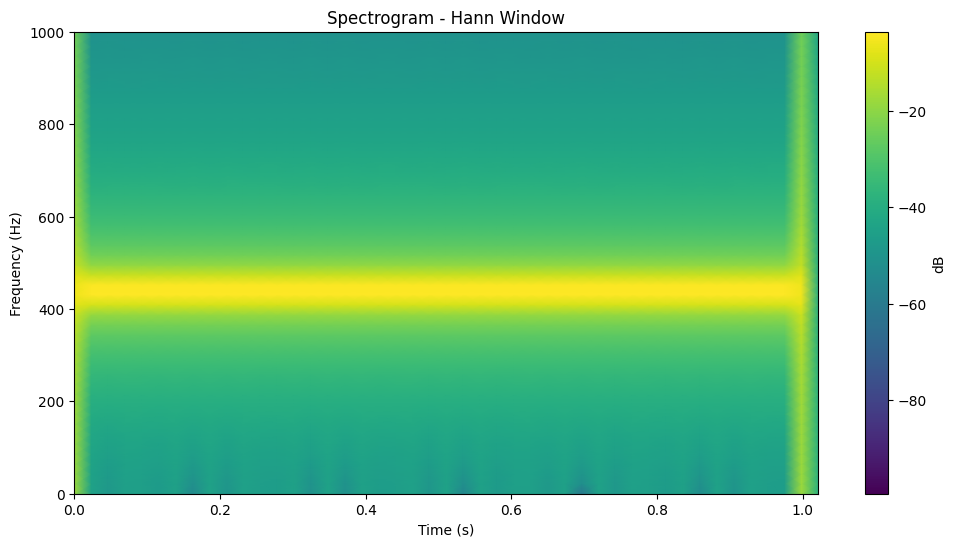

In [ ]:
# Compute STFT with hann window
# your code is here

# Plot spectrogram
# your code is here

### **2.4 Compare the two spectrograms** [1.5 score]
- **Question**: In the rectangular case, do you see energy at frequencies **other than 440 Hz**? [0.5 score]
- **Question**: Is the main lobe wider or narrower with Hann? [0.5 score]
- **Question**: Which window shows cleaner, more focused energy at 440 Hz? [0.5 score]

Answers to questions:

Your answers here.
     

### **2.5 Try a signal with two close frequencies** [2 score]
- Generate two sine waves: 440 Hz and 460 Hz.
- Repeat 2.2 and 2.3.
- **Question**: Can you distinguish the two tones with rectangular window? With Hann?


In [ ]:
# your code here

**Answer**: YOur answer here

### **2.6 Analyze a real instrument note** [1 score]
- Load a flute note (A5).
- Compute spectrograms with rectangular and Hann windows.
- **Question**: Does rectangular window create "smearing" or artificial frequencies? [0.5 score]
- **Question**: Which spectrogram better reflects the true harmonic structure? [0.5 score]

In [ ]:
# Load flute note A5
row = df[(df['Instrument (in full)'] == "Flute") & (df['Pitch'] == 'A5')].iloc[0]
y_inst, sr_inst = # your code here

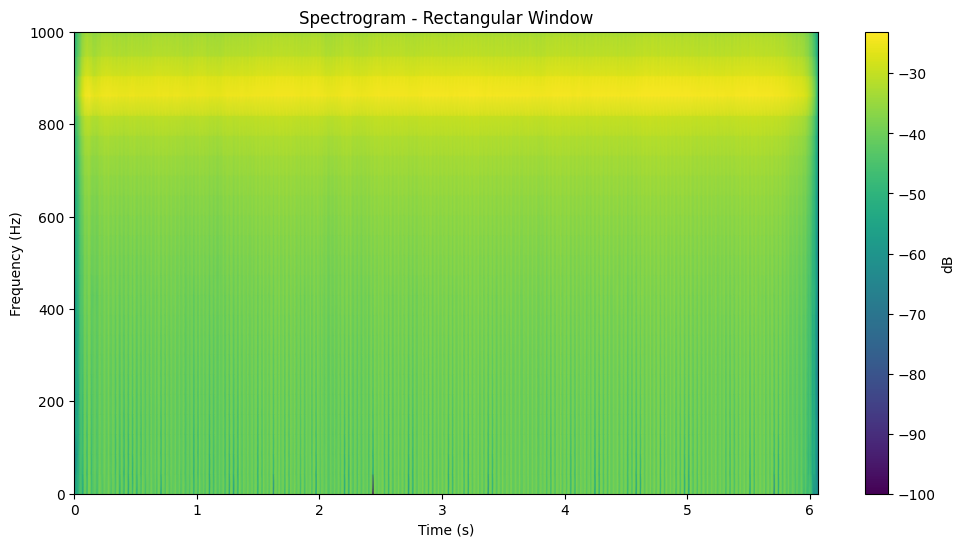

In [ ]:
# Compute STFT with rectangular and hann window

# Plot spectrograms

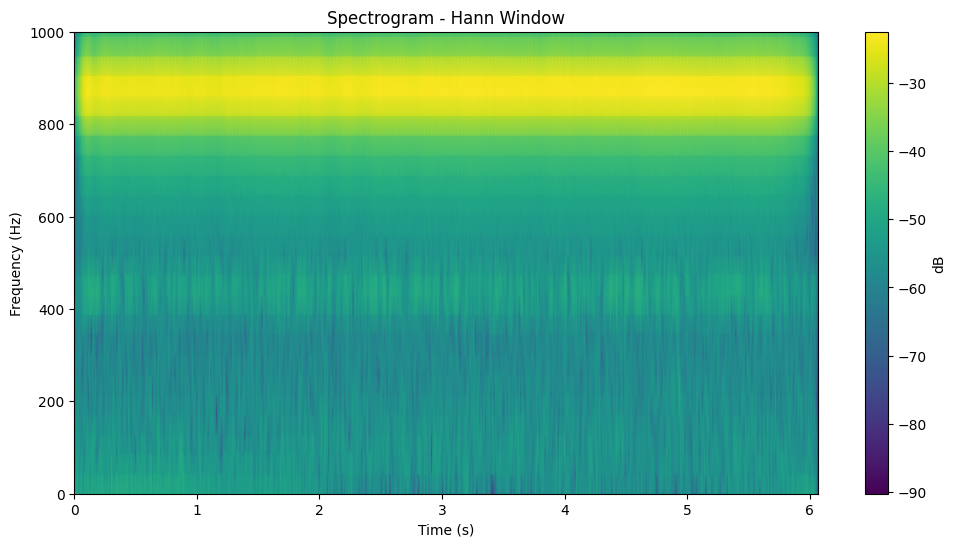

**Answer**: your answer here.

### **2.7 Conclusion** [3 score]
- Write 3–4 sentences explaining:
  - What is **spectral leakage**?
  - Why does rectangular window cause it?
  - Why is a smooth (bell-shaped) window better for audio analysis?

**Answer**: YOUR ANSWER HERE.

# **Task 3: Implement Your Own Mel-Spectrogram Transform** [5 score]

### **Goal**: Understand how Mel-scale warping works by implementing it manually.

### **3.1 Load an audio file** [0.5 score]
- Pick any `.wav` from the dataset.
- Load with `librosa.load(..., sr=22050)`.

In [ ]:
# Load audio
sample = df.iloc[0]
y, sr = librosa.load(your code here, sr=22050)

### **3.2 Compute STFT** [0.5 score]
- Use `librosa.stft` with `n_fft=2048`, `hop_length=512`, `window='hann'`.
- Compute power spectrogram: `S = np.abs(stft_result) ** 2`.

In [ ]:
# Compute STFT


### **3.3 Create Mel filterbank manually** [2 score]
- Number of Mel bands: `n_mels = 128`.
- Frequency range: 0 to `sr/2`.
- Steps:
  1. Convert Hz to Mel: `mel = 2595 * np.log10(1 + f / 700)`
  2. Create `n_mels + 2` equally spaced points in Mel scale.
  3. Convert back to Hz.
  4. Build triangular filters (each filter overlaps with neighbors).
- Output: a matrix `mel_basis` of shape `(n_mels, n_fft//2 + 1)`.

> 📚 Reference: [Librosa mel filterbank docs](https://librosa.org/doc/main/generated/librosa.filters.mel.html)

In [ ]:
def hz_to_mel(frequencies):
    """Convert Hz to Mel scale"""
    return # your code here

def mel_to_hz(mels):
    """Convert Mel to Hz scale"""
    return # your code here

def create_mel_filterbank(sr, n_fft, n_mels=128, fmin=0.0, fmax=None):
    """Create Mel filterbank manually"""

    # Frequency bins
    n_freqs = # your code here
    linear_freqs = # your code here

    # Mel points
    min_mel = # your code here
    max_mel = # your code here
    mel_points = # your code here
    hz_points = # your code here

    # Create filterbank
    filterbank = np.zeros((n_mels, n_freqs))

    for m in range(n_mels):
        # Triangle vertices
        left = # your code here
        center = # your code here
        right = # your code here

        filterbank[your code here] = # your code here

    return filterbank

# Create filterbank
mel_basis_manual = create_mel_filterbank(sr, n_fft, n_mels=128)

### **3.4 Apply filterbank to power spectrogram** [0.5 score]
- Compute: `mel_spec_manual = np.dot(mel_basis, S)`

In [ ]:
# Apply manual filterbank
mel_spec_manual = # your code here

### **3.5 Compute Mel-spectrogram using librosa** [0.5 score]
- Use `librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128)`

In [ ]:
# Librosa version
mel_spec_librosa = # your code here

### **3.6 Compare and validate** [1 score]
- Use `np.allclose(mel_spec_manual, mel_spec_librosa, atol=1e-5)`
- If not close, debug your filterbank.
- Plot both Mel-spectrograms side by side (in dB scale).
- **Question**: Are they visually identical?

Manual and librosa implementations match: False


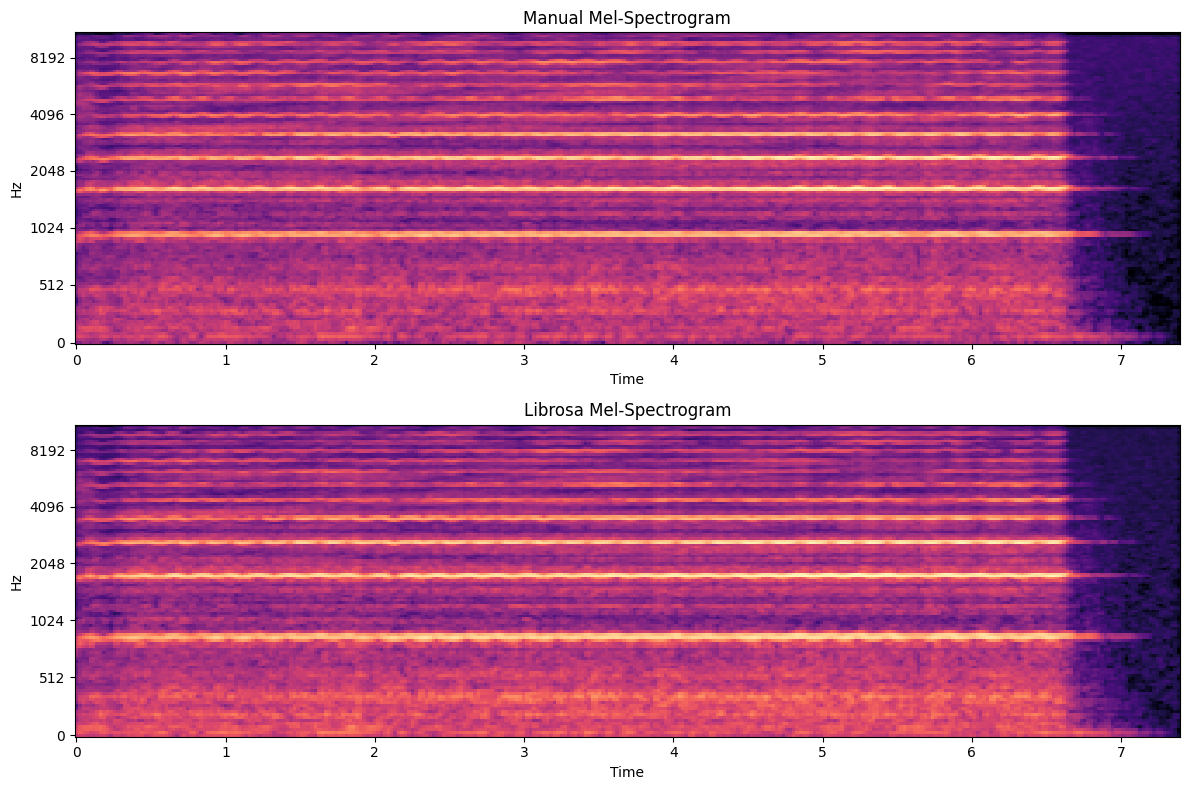

In [ ]:
# Compare
are_close = # your code here
print(f"Manual and librosa implementations match: {are_close}")

# Plot comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

librosa.display.specshow(
    librosa.power_to_db(mel_spec_manual, ref=np.max),
    sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax1
)
ax1.set_title('Manual Mel-Spectrogram')

librosa.display.specshow(
    librosa.power_to_db(mel_spec_librosa, ref=np.max),
    sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax2
)
ax2.set_title('Librosa Mel-Spectrogram')

plt.tight_layout()
plt.show()

### **3.7 Bonus: Try with torchaudio**
- Repeat using `torchaudio.transforms.MelSpectrogram`.
- Compare with your implementation.

In [ ]:
# !pip install torch torchaudio

In [ ]:
import torchaudio
import torch
mel_transform = torchaudio.transforms.MelSpectrogram(
    sample_rate=sr, n_fft=n_fft, hop_length=hop_length, n_mels=128
)
mel_spec_torch = mel_transform(torch.tensor(y)).numpy()

# Note: torchaudio uses different scaling, so direct comparison needs care
